## Scatterplots

### Basic scatterplot

I guess we all know the **scatterplot**. The plot where all data entries are mapped as dots (or any other arbitrary symbol) on a x, y plot, where the x-axis represents one data dimension (data column) and the y-axis another data dimension of the data entries.

In this exercise we are going to make scatterplots of the [Fisher Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) with Pandas. This is a famous cluster dataset of the Iris flower made by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), where the data is clustered in 3 different categories according to their species of the Iris flower family. All data entries have 4 features, the sepal length and width and the petal length and width (for reference look at the image below).

<img src="./data/images/schem_iris.gif">

Now lets see if we can find the clusters of the dataset by looking at the scatter plots of the different features. First, as always, we need to import the needed python modules and prepare our dataframe.

In [1]:
# Lets clear all previous python imports and variables by resetting the python kernel to prevent any conflicts.
%reset -f

%matplotlib nbagg

# Now import all the needed packages and modules
import matplotlib               # Matplotlib is the core package to plot publication grade images
import matplotlib.pyplot as plt # # Pyplot: a collection functions that make matplotlib work like MATLAB
import pandas as pd             # Pandas is the data analysis and 'visualization' package 
from sklearn import datasets    # This is the module from which we will retreive the Iris dataset

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) # change the default figsize to be larger

# First lets load the Fisher Iris dataset
irisDataset = datasets.load_iris();
print('Iris dataset keys: {}\n'.format(irisDataset.keys()))

print('Iris dataset nr. of entries: {}\n'.format(len(irisDataset['data'])))

print('Iris dataset nr. of features: {}\n'.format(len(irisDataset['feature_names'])))

print('Iris dataset:\n {}'.format(irisDataset))

Iris dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Iris dataset nr. of entries: 150

Iris dataset nr. of features: 4

Iris dataset:
 {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4]

As you can see the dataset is stored in a python dictionary (key-value datastructure). The dataset has the following keys:
- **target_names**: an array of the cluster names (i.e. the iris species names).
- **data**: an numpy array of data entries with values for each feature.
- **target**: an array of species cluster id's per data entry.
- **DESCR**: an description of this dataset.
- **feature_names**: an array with all the feature names for each feature in data.

Now that we know what the data looks like we need to prepare it and store it in a Pandas DataFrame in order to visualize it.

In [2]:
# To make a DataFrame of the data we pass the data with the data argument 
# and the feature names with the columns argument into a Pandas DataFrame.
irisDataFrame = pd.DataFrame(data=irisDataset.data, columns=irisDataset.feature_names);
speciesNames  = irisDataset.target_names; # Store the species names for later use

# Both species names and ID columns, included for later used and convenience, were not present 
# in the data segment of the Iris dataset and that is why we need to include them separately.
irisDataFrame['speciesByIdx']  = irisDataset.target;

# The species names are added with the use of a list comprehension. This list comprehension
# creates a list by iterating throught the species cluster ID list and map the corresponding 
# species name to that list entry.
irisDataFrame['speciesByName'] = [speciesNames[x] for x in irisDataset.target];

# This function will change the width of the output of how Pandas prints its dataframes.
# This way Pandas can print more columns next to each other.
pd.set_option('display.width', 1000)

irisDataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speciesByIdx,speciesByName
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


As you can see the Iris dataset is now neatly stored in a DataFrame with 6 columns. Now that everything is prepared lets plot the scatterplot.

<IPython.core.display.Javascript object>


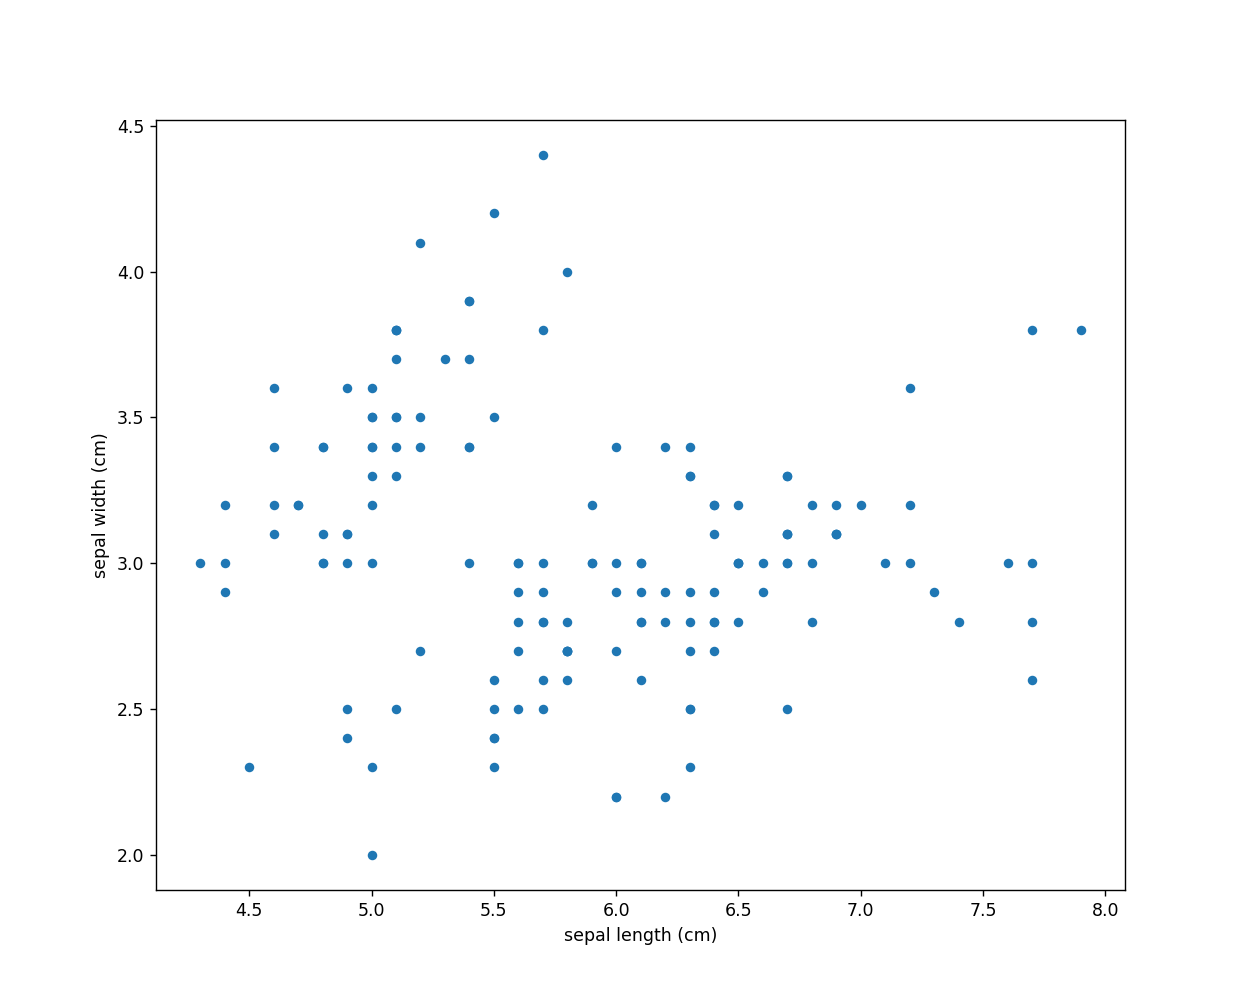

In [3]:
# Now that everything has been prepared we can plot the basic scatterplot of for example the sepal length and width.
irisDataFrame.plot(kind='scatter',         # The type of plot, in this case the scatterplot
                   x='sepal length (cm)',  # The feature that will be mapped on the x-axis
                   y='sepal width (cm)');  # The feature that will be mapped on the y-axis

* * *
* * *
#### Exercise
Try to look at different scatterplots by changing the data dimensions that are mapped to the x and y axis (i.e. 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'). Try to see if you can differentiate all 3 clusters with only 2 data dimensions.

<IPython.core.display.Javascript object>


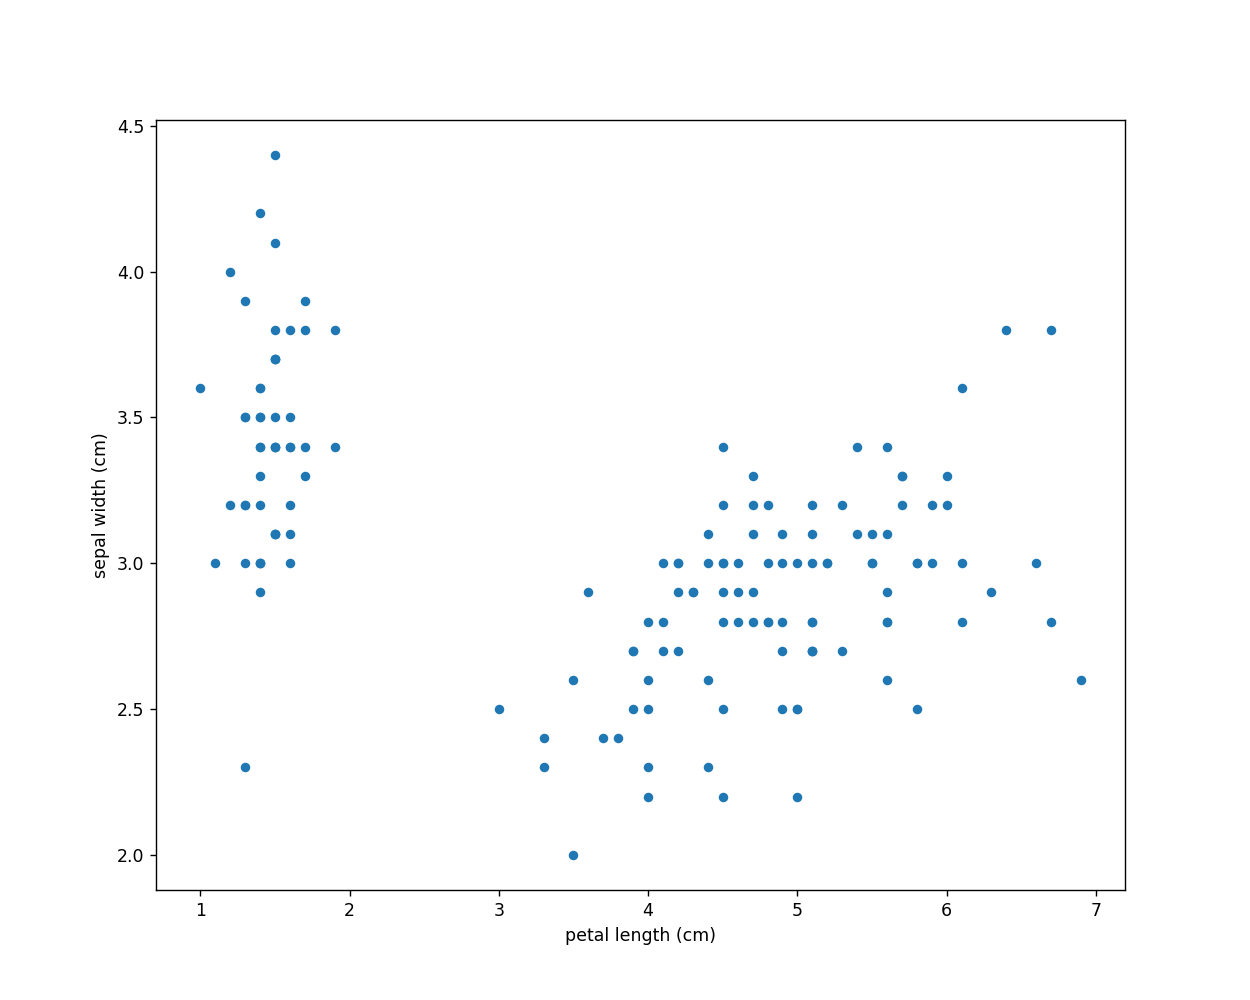

In [8]:
# TODO: Replace <FILL IN> with appropriate code

irisDataFrame.plot(kind='scatter',
                   x='petal length (cm)',
                   y='sepal width (cm)');

As you can see from this scatterplot you can only distinguish 2 clusters but not all three. Therefore we are going bring in some extra dimensions into the scatterplot.
* * *
* * *

### Adding some extra dimensions

We can add some extra dimensions to the scatter plot by setting the size of the dot by a certain data dimension and  colormapping the dots by another data dimension of the data.

Lets first map an extra data dimension to the dot's size. For this size mapping we need to prepare a list of dot sizes from which you can distinguish the different clusters. For this we create a new metric, **diffMin**, which is the data dimension value minus the lowest data dimension value in that data dimensions column. Finally we exaggerate this metric by multiplying it by a 100 so that the visual difference is significant enough in the scatterplot. 

Once the size list has been created you can pass it to the **s** argument of the DataFrame plot function.

<IPython.core.display.Javascript object>


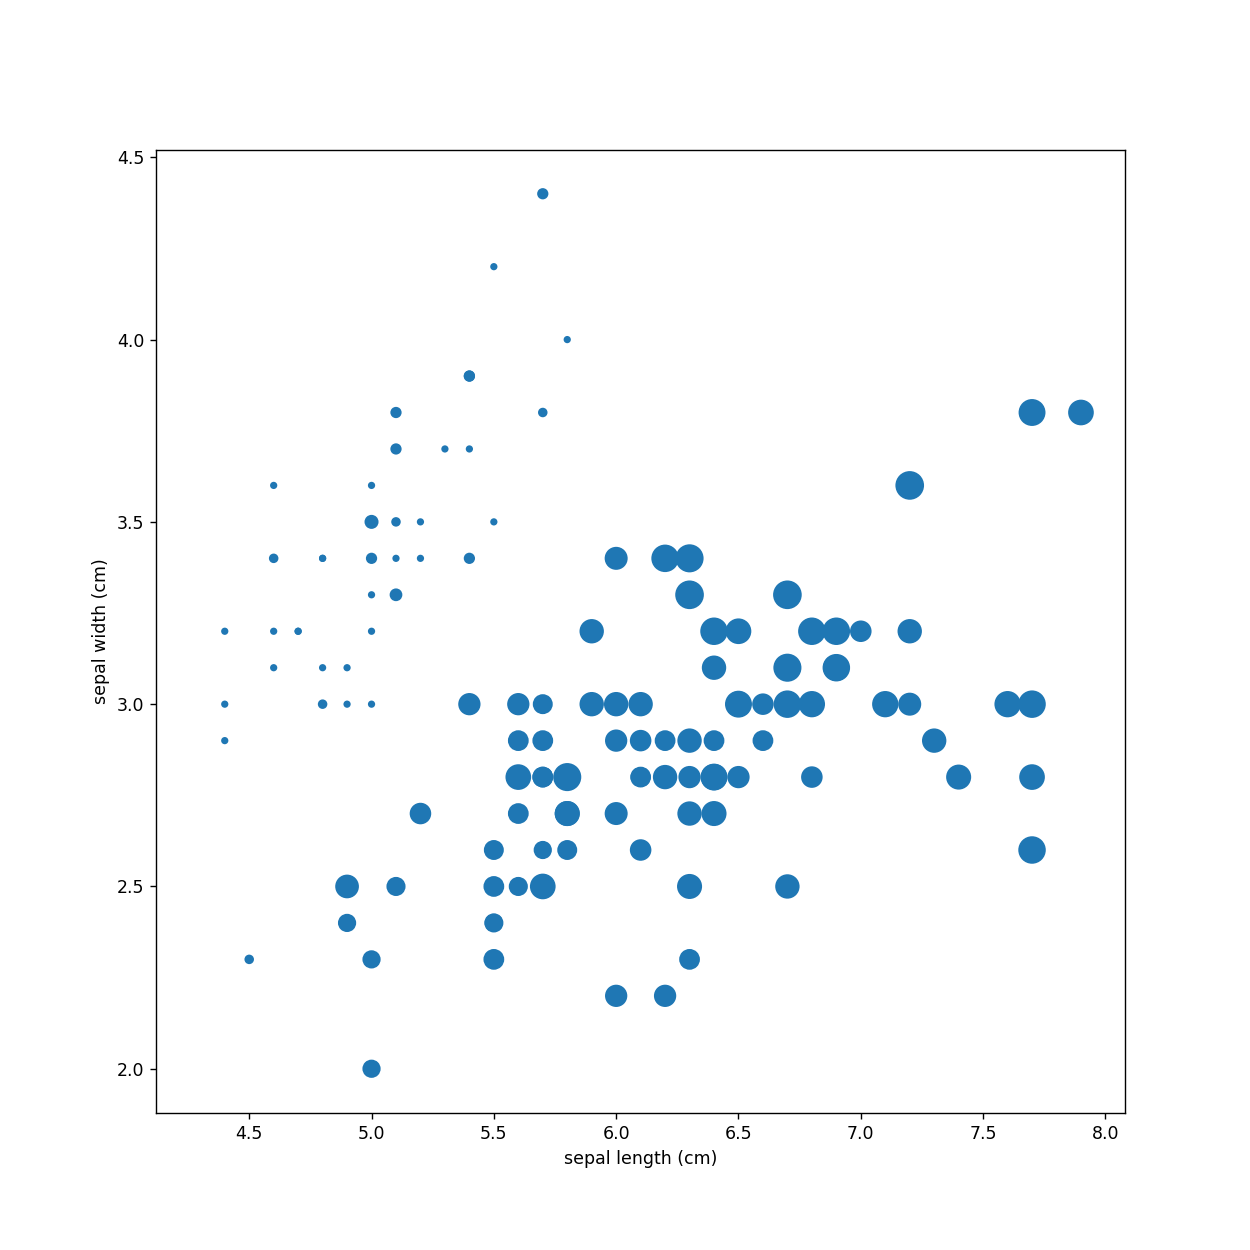

In [9]:
diffMin = 100 * (irisDataFrame['petal width (cm)'] - irisDataFrame['petal width (cm)'].min())

irisDataFrame.plot(kind='scatter',
                   figsize=(10,10),
                   x='sepal length (cm)', 
                   y='sepal width (cm)', 
                   s=diffMin
                  );


From this you can cleary distinguish 1 cluster from the other 2 mixed clusters and you can slightly distinguish the other 2 mixed cluster from each other by the slightly bigger dots on the right side. 

To accentuate the difference in the mixed 2 clusters even more we can introduce a colormap to reveal another data dimension in the scatter plot by passing the **c** and **colormap** arguments to the plot function.
<!--- As you can see this is a very effective way to see the distribution of the clusters in the scatterplots. --->

<IPython.core.display.Javascript object>


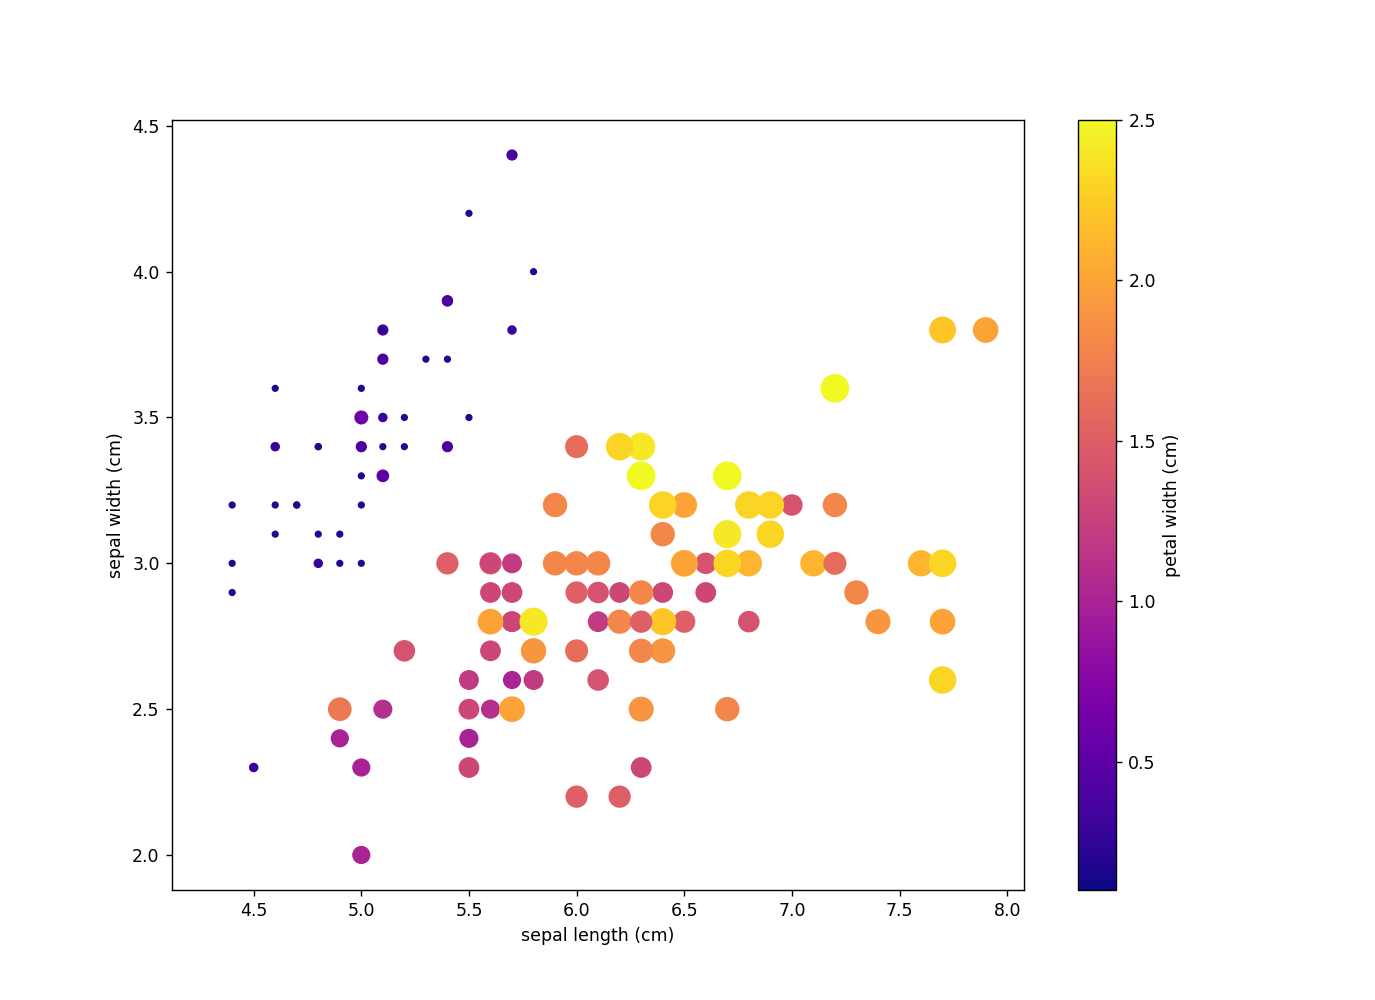

In [10]:
# Here we introduce to new arguments in the dataframe plot function, 'c' which is the data column used for the color
# mapping and 'colormap' which is the colormap used for the colormapping
irisDataFrame.plot(kind='scatter',
                   figsize=(11,8),
                   x='sepal length (cm)', 
                   y='sepal width (cm)', 
                   c='petal width (cm)',       
                   colormap=matplotlib.colormaps['plasma'],
                   s=diffMin);

From this plot you can now distinguish the 3 separate clusters. The purple-ish dots are from one cluster and the orange dots are from the other clusters. You can verify this with the following exercise.

* * *
* * *

#### Exercise
Try to verify that there are indeed 3 clusters by changing the **c** argument to another data dimensions, 'petal length (cm)', 'petal width (cm)', 'sepal length (cm)', sepal width (cm)' or 'speciesByIdx'. Try to find out which one gives the best representation of the clusters. You can also try to change the colormap name 'magma' to one of the following, 'viridis', 'inferno' or 'plasma' and see which one suits you or the visualization the best.

<IPython.core.display.Javascript object>


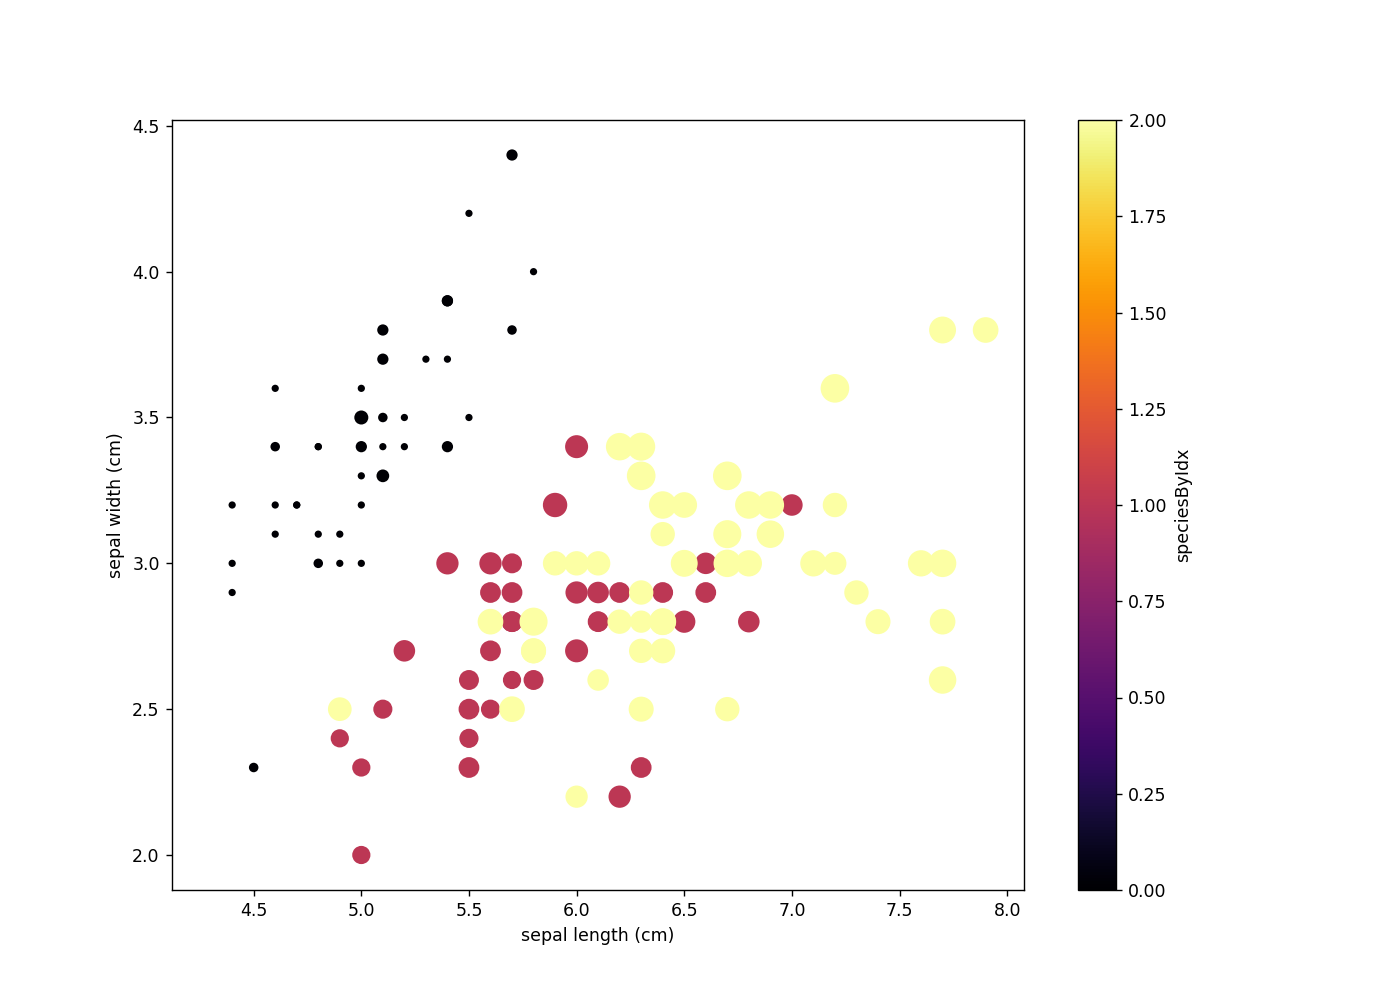

In [17]:
# TODO: Replace <FILL IN> with appropriate code

irisDataFrame.plot(kind='scatter',
                   figsize=(11,8),
                   x='sepal length (cm)', 
                   y='sepal width (cm)', 
                   c='speciesByIdx',
                   colormap=matplotlib.colormaps['inferno'],
                   s=diffMin);

* * *
* * *
This scatterplot is good for 4 data dimensions in this setting but sometimes you have more data dimensions. In this case you can use a scatterplot matrix to get an overall view of all the data dimensions.

### Scatterplot matrix

Now we are going to do something a little more complex, the scatterplot matrix. A scatter plot is a plot where the dataset entries are mapped on a graph, where the x and y axes represent one of the dimensions within the dataset. As you can imagine this limits the visualization to 2 dimensions, one for each axis. This can be solved by using a **scatter plot matrix**. This scatterplot matrix plots a matrix of scatterplots where each row represents one dimension for the y-axes of the scatterplots in that row and each column represents one dimension for the x-axes of the scatterplots in that column.

<IPython.core.display.Javascript object>


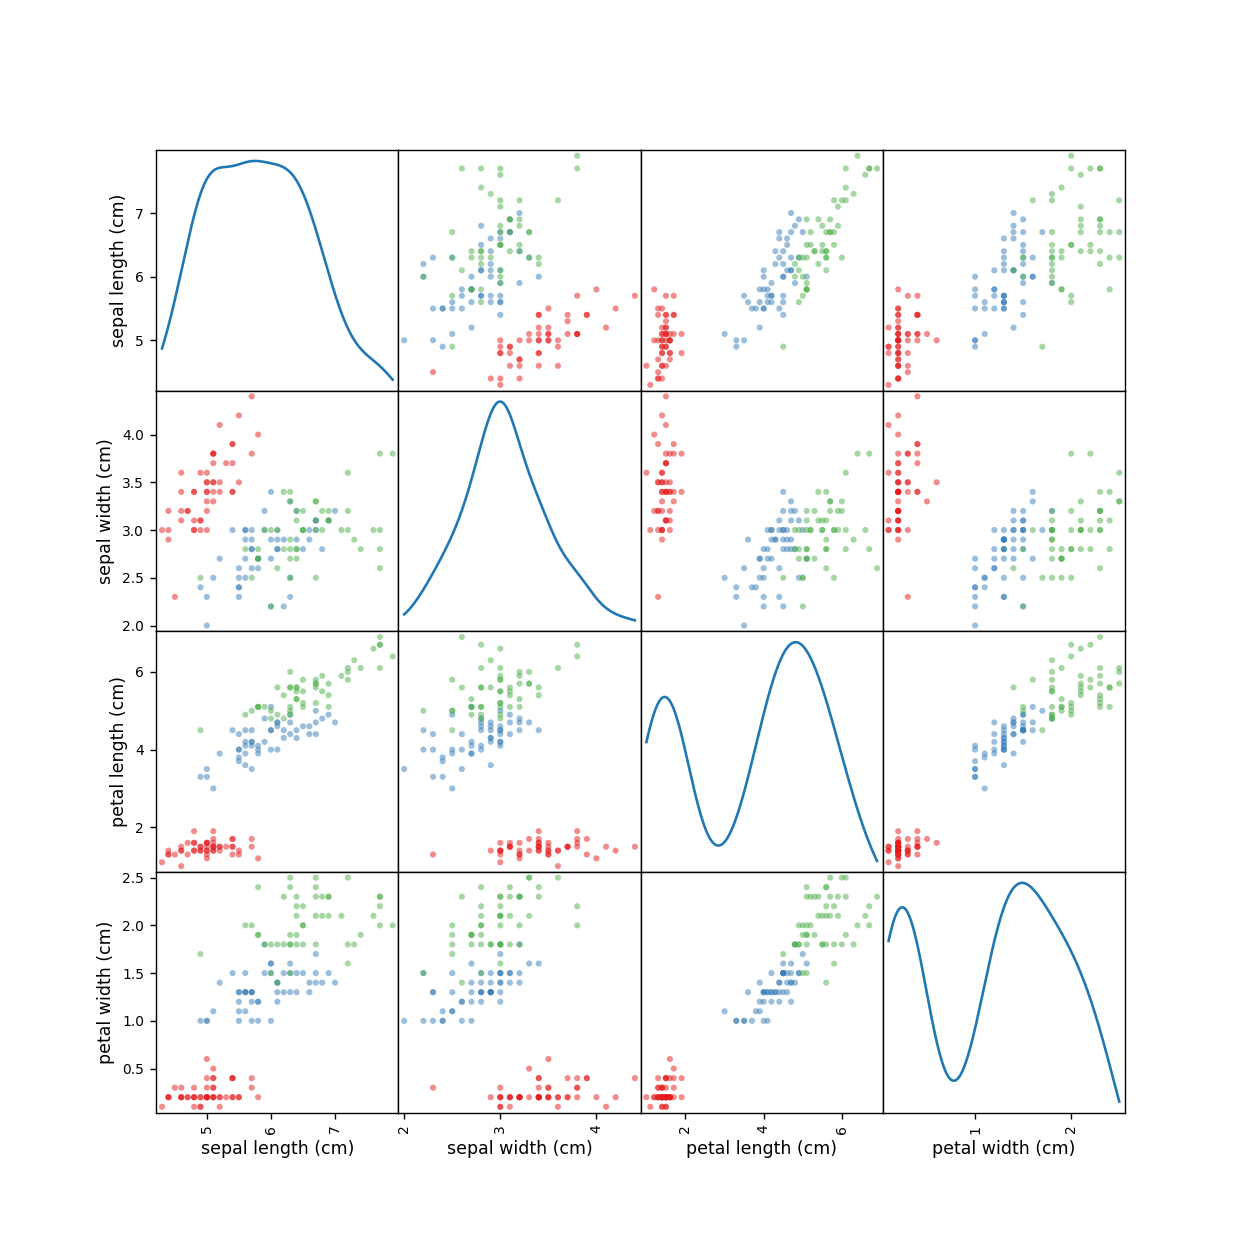

In [18]:
from pandas.plotting import scatter_matrix # Import the function to plot a scatterplot

scatter_matrix(
    irisDataFrame.drop(['speciesByIdx','speciesByName'],axis=1),  # drop the none feature columns
    figsize=(10, 10),                                             # square figuresize for the matrix
    alpha=0.5,                                                    # alpha of 0.5 to see overlapping dots
    s=50,                                                         # fixed size of 50
    c=[matplotlib.colormaps['Set1'](idx) for idx in irisDataFrame['speciesByIdx']],
    diagonal='kde');                                              # diagonal line are feature distributions

As you might have noticed the diagonal line entries of the scatter plot matrix are not scatter plots. This is because the scatterplot where the same data dimension is mapped on both axes would just give you a diagonal line. Instead of a scatter plot we display that data dimension's Kernel Density Plot.

### Oldtimer car dataset
Now lets see if we can apply our new knowledge of scatterplots on a different dataset, the oldtimer car dataset. First we will prepare the data before we can do the exercise.

In [19]:
import matplotlib               # Matplotlib is the core package to plot publication grade images
import matplotlib.pyplot as plt # # Pyplot: a collection functions that make matplotlib work like MATLAB
import pandas as pd             # Pandas is the data analysis and 'visualization' package\
import numpy as np
    
%matplotlib nbagg

cars = pd.read_csv('./data/scatter/cars.csv')

originIdx = cars['origin'].value_counts().index.values.tolist()
cars['originByIdx'] = [originIdx.index(origin) for origin in cars['origin']]

cars = cars.drop(['model', 'origin'], axis=1)
cars

,MPG,cylinders,horsepower,weigth,year,originByIdx
0,18.0,8,130,3504,70,0
1,15.0,8,165,3693,70,0
2,18.0,8,150,3436,70,0
3,16.0,8,150,3433,70,0
4,17.0,8,140,3449,70,0
...,...,...,...,...,...,...
387,27.0,4,86,2790,82,0
388,44.0,4,52,2130,82,2
389,32.0,4,84,2295,82,0
390,28.0,4,79,2625,82,0


* * *
* * *

#### Exercise
Now its your turn to see if you can find any correlations within the data (e.g. efficiency versus the build year). Try to confirm your thoughts on which country of origin makes the heaviest and least efficient cars. The data is prepared the only thing you need to do is use the right functions with the right arguments.

In [ ]:
# FILL IN YOUR CODE HERE

* * *
* * *

This concludes the Scatterplot course material. Now you may proceed to the Parallel Coordinate Plot notebook by clicking on the following link: [Parallel Coordinate Plot](./2.&#32;Parallel&#32;coordinate&#32;plots.ipynb).